In [5]:
"""\
# Copyright (C) 2023 Jesús Bautista Villar <jesbauti20@gmail.com>
- Testing a proportional 3D heading control algorithm -
"""

import os
import numpy as np

# -- Graphic tools --
import matplotlib.pyplot as plt

# -- Our utils --
from simulations.utils.tools_math import *
from simulations.utils.tools_plot import *

from simulations.utils.tools_basic import createDir
from simulations.sim_test import sim_test
from simulations.sim_ss_test import sim_ss_test


# Create the output directory
OUTPUT_FOLDER = os.path.join("output")
createDir(OUTPUT_FOLDER)

The directory 'output' already exists!


## Simulation frame to test the 3D heading controller

  0%|          | 0/721 [00:00<?, ?it/s]

100%|██████████| 721/721 [00:00<00:00, 1140.68it/s]


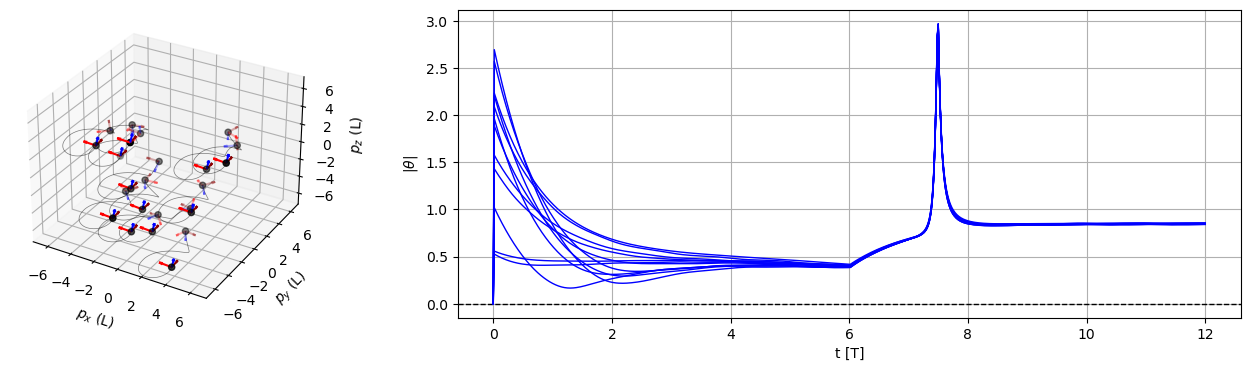

In [2]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_test(n_agents=12, tf=12, wx=2*np.pi, L1=np.array([[1,-1,0]])/np.sqrt(2),
                      v_rotation=True, fb_control=True, sim_kw={"kw":1}, arr_len=1)
sim_frame.numerical_simulation()

# Plot the summary (initial + final state)
sim_frame.plot_summary()

Animation parameters:  {'fps': 60.0, 'tf': 3, 'frames': 179}


 98%|█████████▊| 176/179 [00:05<00:00, 31.95it/s]

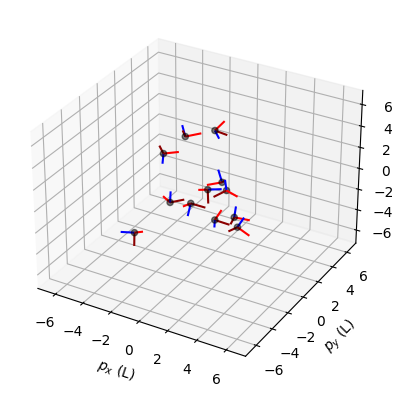

In [3]:
# Generate an animation of the whole simulation
sim_frame.generate_animation(OUTPUT_FOLDER)

## Plotting trajectories in $S0_3$

In [2]:
# Initialise the simulation frame and launch the numerical simulation
L1 = np.array([[1,0,0]])
sim_frame = sim_test(n_agents=10, tf=12, wx=np.pi/2, L1=L1/np.linalg.norm(L1),
                      v_rotation=False, fb_control=True, sim_kw={"kw":1}, arr_len=1)
sim_frame.numerical_simulation()

# Extract the desired data (R matrices)
data_R = sim_frame.data["R"]
print(data_R.shape)

  0%|          | 0/721 [00:00<?, ?it/s]

100%|██████████| 721/721 [00:00<00:00, 1320.16it/s]

(721, 10, 3, 3)


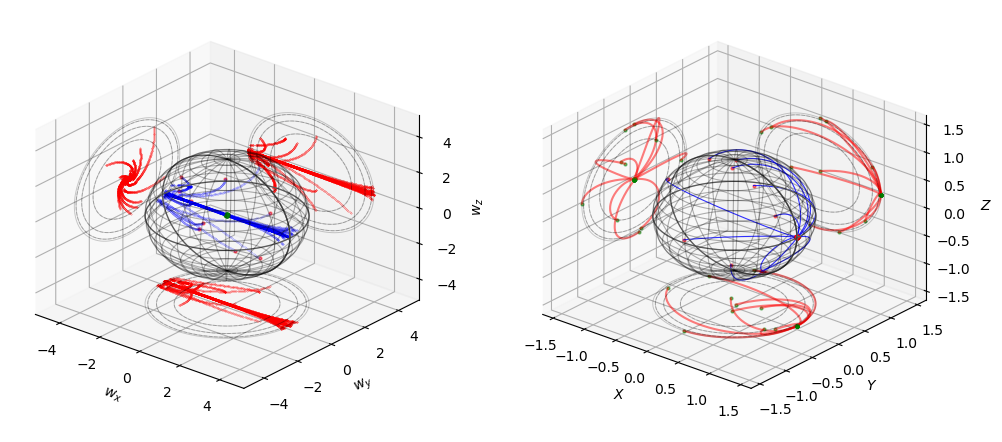

In [3]:
fig  = plt.figure(figsize=(12,12))
grid = plt.GridSpec(1, 2, hspace=0, wspace=0.2)

ax1 = fig.add_subplot(grid[:, 0], projection='3d')
ax2 = fig.add_subplot(grid[:, 1], projection='3d')

# Plotting the SO(3) trajectory
plot_so3_traj(data_R, ax=ax1, lim=5)

# Plotting the 3D heading trajectory
plot_heading_traj(data_R, ax=ax2, lim=1.6)

## Source seeking in 3D (WIP)

100%|██████████| 1501/1501 [00:01<00:00, 1187.03it/s]


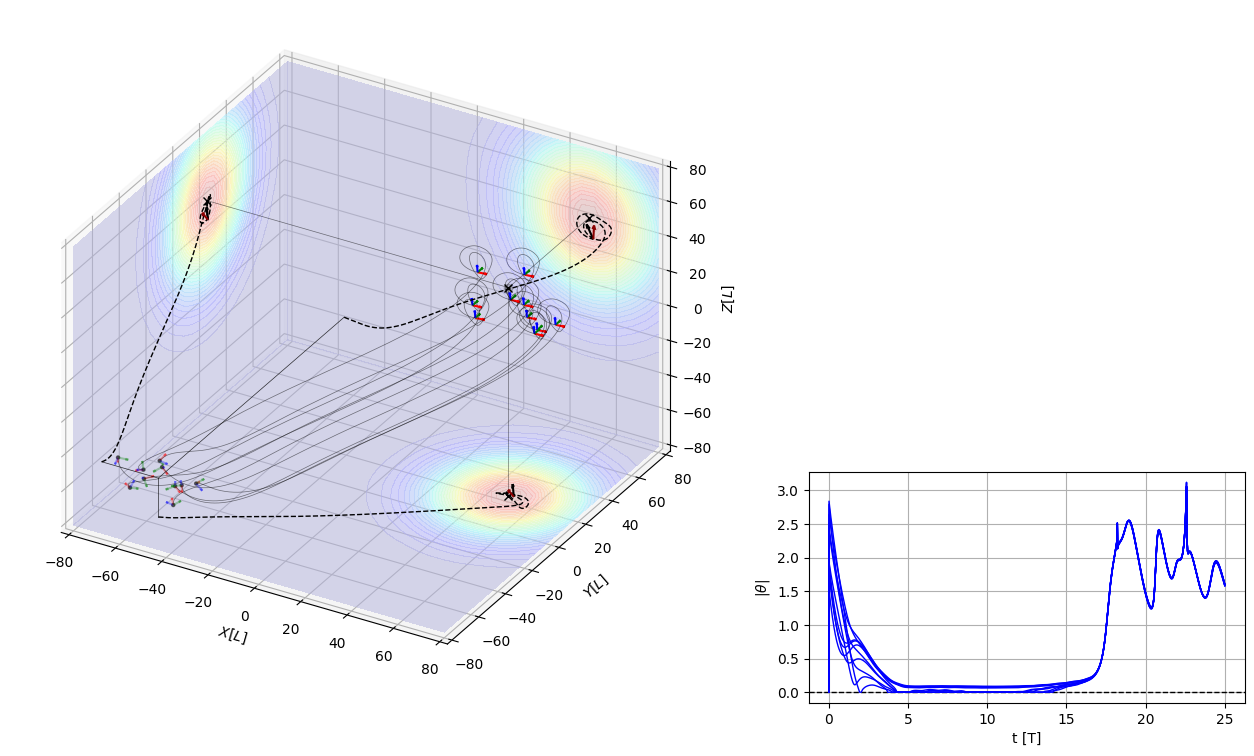

In [6]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_ss_test(n_agents=10, tf=25, wx=2*np.pi, sim_kw={"kw":0.9})
sim_frame.numerical_simulation()

# Plot the summary (initial + final state)
sim_frame.plot_summary(dpi=200)

100%|█████████▉| 1498/1499 [09:48<00:00,  2.54it/s]


Animation parameters:  {'fps': 60.0, 'tf': 25, 'frames': 1499}


100%|█████████▉| 1498/1499 [01:48<00:00, 13.95it/s]

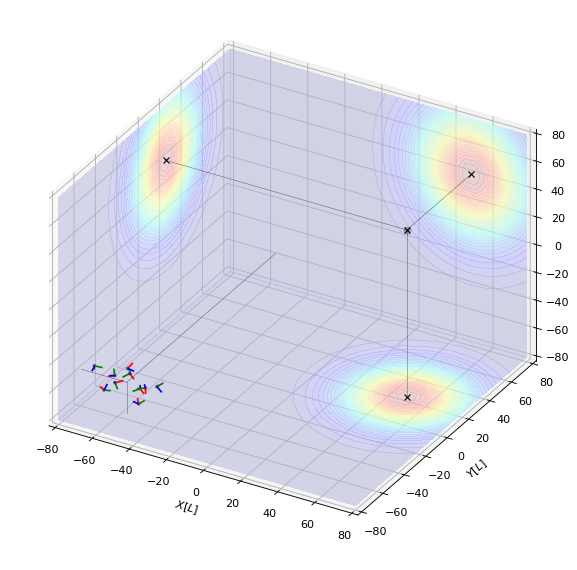

100%|█████████▉| 1498/1499 [02:06<00:00, 13.95it/s]

In [7]:
# Generate an animation of the whole simulation
sim_frame.generate_animation(OUTPUT_FOLDER, res_label="HD")